<a href="https://colab.research.google.com/github/GangCheng1972/Colab/blob/master/DeepLearningWithPython/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy arrays.

In [19]:
import tensorflow as tf
from keras.datasets import mnist

# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# observe the shape of datasets
print('The training_images has the shape as {0}, the rank of {1} and the type as {2}.'
      .format(train_images.shape, train_images.ndim, train_images.dtype))
print('The training_labels has the shape as {0}, the rank of {1} and the type as {2}.'
      .format(train_labels.shape, train_labels.ndim, train_labels.dtype))
print('The test_images has the shape as {0}, the rank of {1} and the type as {2}.'
      .format(test_images.shape, test_images.ndim, test_images.dtype))
print('The test_labels has the shape as {0}, the rank of {1} and the type as {2}.'
      .format(test_labels.shape, test_labels.ndim, test_labels.dtype))

The training_images has the shape as (60000, 28, 28), the rank of 3 and the type as uint8.
The training_labels has the shape as (60000,), the rank of 1 and the type as uint8.
The test_images has the shape as (10000, 28, 28), the rank of 3 and the type as uint8.
The test_labels has the shape as (10000,), the rank of 1 and the type as uint8.


Let’s display the fifth digit in this 3D tensor, using the library Matplotlib.first

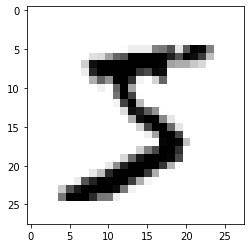

In [21]:
digit = train_images[0]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Before training, we’ll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval. Previously, our training images, for instance, were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

In [0]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255.0
test_images = test_images.reshape((10000, -1))
test_images = test_images.astype('float32') / 255.0

We also need to categorically encode the labels,

In [3]:
from keras.utils import to_categorical

print(train_labels.shape)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels.shape)

(60000,)
(60000, 10)


The workflow will be as follows: First, we’ll feed the neural network the training data, train_images and train_labels. The network will then learn to associate images and labels. Finally, we’ll ask the network to produce predictions for test_images, and we’ll verify whether these predictions match the labels from test_labels.

The network consists of a sequence of three Dense layers, which are densely connected (also called fully connected) neural layers. The third (and last) layer is a 10-way softmax layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

**A loss function** — How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.

**An optimizer** — The mechanism through which the network will update itself based on the data it sees and its loss function.

**Metrics to monitor during training and testing** — Here, we’ll only care about accuracy (the fraction of the images that were correctly classified). 

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

We’re now ready to train the network, which in Keras is done via a call to the network’s fit method—we fit the model to its training data:

In [6]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.2351 - accuracy: 0.9288
Epoch 2/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.0874 - accuracy: 0.9731
Epoch 3/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.0571 - accuracy: 0.9826
Epoch 4/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.0407 - accuracy: 0.9875
Epoch 5/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0311 - accuracy: 0.9901


Now let’s check that the model performs well on the test set. This gap between training accuracy and test accuracy is an example of **overfitting**:

In [7]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 50us/step
test_acc: 0.9781000018119812
